In [1]:
import sqlite3 as sql
import pandas as pd

In [3]:
conn = sql.connect('database.sqlite')
conn

In [5]:
a = conn.execute('select * from Salaries')
a

In [7]:
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [9]:
pd.read_sql_query('select * from Salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [11]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

. Top 10 highest paid employees (by TotalPayBenefits)

In [15]:
q = '''select EmployeeName, TotalPayBenefits from Salaries
    order by TotalPayBenefits desc limit 10 '''

sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
5,Gregory P Suhr,425815.28
6,Joanne M Hayes-White,422353.40
7,Gregory P Suhr,418019.22
8,Joanne M Hayes-White,417435.10
9,Ellen G Moffatt,415767.94


2. Find which year has missing data of Employees with 'Not Provided'/ 'Not provided' .

In [23]:

q= ''' select distinct year from salaries 
where EmployeeName = "Not Provided" or EmployeeName = "Not provided" '''
sql_query(q)

,Year
0,2011
1,2012
2,2014


3. Number of unique agencies

In [29]:
pd.read_sql_query("""
    SELECT COUNT(DISTINCT Agency) AS UniqueAgencies
    FROM Salaries
""", conn)

q = ''' select count(distinct Agency) AS UniqueAgencies
    from Salaries'''

sql_query(q)

,UniqueAgencies
0,1


4. Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [35]:
q = '''  select avg(BasePay) as AvgBasePay,
        avg(OvertimePay) as AvgOvertimePay,
        avg(TotalPay) as AvgTotalPay
    from Salaries
    where Year = 2011 '''

sql_query(q)

,AvgBasePay,AvgOvertimePay,AvgTotalPay
0,63595.956517,4531.065429,71744.103871


5. Plot the top 10 job titles with the highest TotalPay in 2014.

In [39]:
q = '''select jobtitle, totalpay from Salaries where Year = 2014 order by 2 desc limit 10 '''

sql_query(q)

,JobTitle,TotalPay
0,Deputy Chief 3,471952.64
1,Asst Med Examiner,390111.98
2,Asst Med Examiner,344187.46
3,Chief Investment Officer,339653.70
4,"Battalion Chief, Fire Suppress",335484.96
5,Asst Chf of Dept (Fire Dept),329390.54
6,Chief of Police,326716.76
7,"Chief, Fire Department",326233.44
8,Commander 3,322143.10
9,Senior Physician Specialist,311650.36


<Axes: xlabel='JobTitle'>

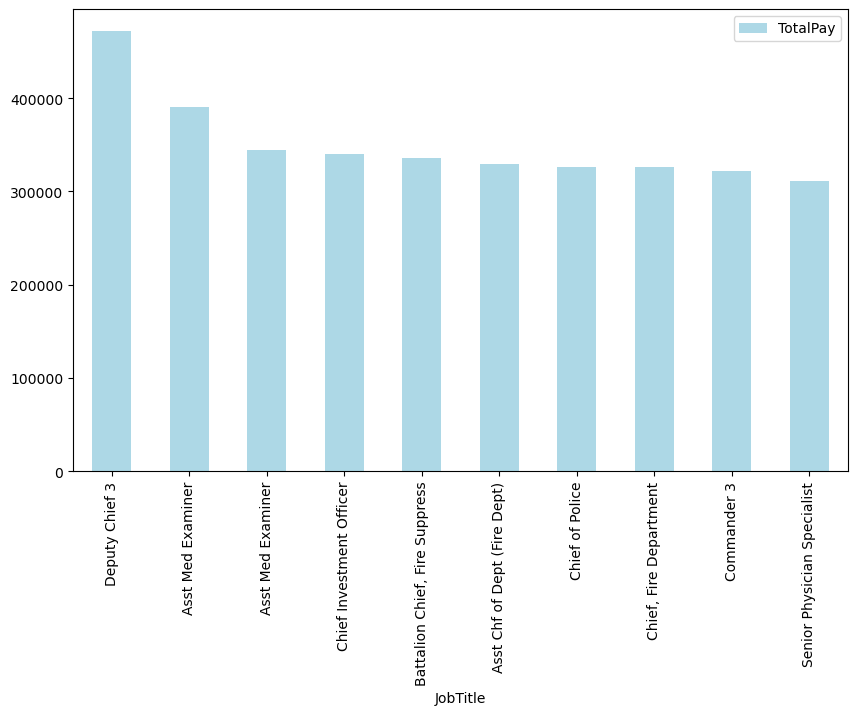

In [43]:
a = pd.read_sql_query(q,conn)
a.plot(kind='bar', x='JobTitle', y='TotalPay', color='lightblue', figsize=(10,6))

6. Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [45]:
q= '''select JobTitle, overtimepay from Salaries 
where overtimepay > 150000 and JobTitle != "Not provided" '''

sql_query(q)

,JobTitle,OvertimePay
0,CAPTAIN III (POLICE DEPARTMENT),245131.88
1,"Lieutenant, Fire Suppression",220909.48
2,EMT/Paramedic/Firefighter,192424.49
3,Firefighter,160418.47
4,"Lieutenant, Fire Suppression",163477.81
5,Deputy Sheriff,196689.18
6,Deputy Sheriff,156077.49
7,Deputy Sheriff,173547.73
8,Deputy Sheriff,173178.23
9,Deputy Sheriff,169659.92


7. Find all employees whose job titles contain the word “CHIEF”

In [51]:
q = '''select jobtitle from Salaries where jobtitle like "%CHIEF%"
'''

sql_query(q)

,JobTitle
0,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,ASSISTANT DEPUTY CHIEF II
2,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...
622,Chief Deputy Adlt Probation Of
623,Chief Clerk
624,Chief Nursery Specialist
625,Chief Preparator


8. Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [57]:
q = '''select count(jobtitle) as 'Count of JobTitle contain Fire & Engineers'
from Salaries
where jobtitle LIKE '%ENGINEER%'
  and jobtitle LIKE '%FIRE%'
  and Year IN (2012, 2013);

'''

sql_query(q)

,Count of JobTitle contain Fire & Engineers
0,16


9. Distinct job titles starting with "CAPTAIN"

In [59]:
q = '''select distinct jobtitle from Salaries where jobtitle like "CAPTAIN%"
'''

sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


10. Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [71]:

q= '''select EmployeeName, BasePay, TotalPay from Salaries
where BasePay > 50000 and TotalPay < 150000  and Basepay != "Not Provided" '''
sql_query(q)

,EmployeeName,BasePay,TotalPay
0,JAY DOWKE,112380.37,149987.24
1,MURRAY BOND,149975.8,149975.80
2,MARILOU GAN,119703.78,149970.85
3,BRIAN COLLINS,105934.65,149964.61
4,GREGORY NEAL,106065.2,149952.47
...,...,...,...
87255,Renee J Allen,52428.53,53458.31
87256,Melody M Butterworth,52389.79,52555.44
87257,Stephanie Reidy,51668.7,51785.23
87258,Paul E Maltzer,51673.98,51673.98
